# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

/home/renato/intel/intelpython27/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [3]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [4]:
pools = []
pools.append(InterneuronPool(conf, 'RC'))

Syn = SynapsesFactory(conf, pools)



Interneuron Pool of RC built
Synaptic Noise on RC built
All the 350 synapses were built


In [5]:
# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in pools[0].unit:
        j.iInjected = 0
    pools[1].atualizePool(t[i])    
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

184.25 13.6499419523 10.0143266476 inf 1.0
185.3 63.4231783837 10.0143266476 1.05 1.0
186.35 59.9836926869 10.0143266476 1.05 1.0
187.4 58.1393770933 10.0143266476 1.05 1.0
188.45 57.4342267284 10.0143266476 1.05 1.0
189.5 53.0896527458 10.0143266476 1.05 1.0
391.1 13.6499346942 10.0143266476 201.6 1.0
392.15 63.4231749322 10.0143266476 1.05 1.0
393.2 59.983690955 10.0143266476 1.05 1.0
394.25 58.1393763676 10.0143266476 1.05 1.0
395.3 57.4342264273 10.0143266476 1.05 1.0
396.35 53.1729675699 10.0143266476 1.05 1.0
474.35 13.6078669592 10.0143266476 78.0 1.0
475.4 63.4031614735 10.0143266476 1.05 1.0
476.45 59.9735263274 10.0143266476 1.05 1.0
477.5 58.1350911944 10.0143266476 1.05 1.0
478.55 57.4324449539 10.0143266476 1.05 1.0
479.6 53.1746448574 10.0143266476 1.05 1.0
549.196399 seconds


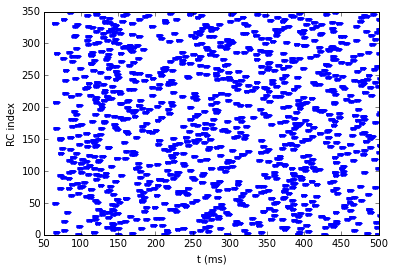

In [6]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

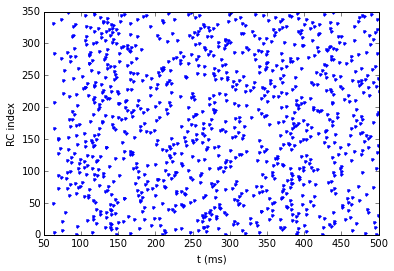

In [7]:
pools[1].listSpikes()

plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

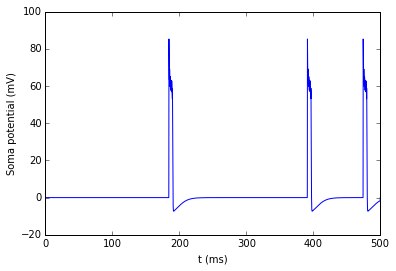

In [8]:
plt.figure()

plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()

In [9]:
ISI = np.array([])
for i in xrange(0,len(pools[1].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[1].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
print ISI

[ 199.4    95.55  107.35   61.05  215.4   154.1   161.85  132.6   143.6
  149.1   126.75  135.    138.05  104.1   147.85   86.4   143.8    87.8
  157.2   106.8   131.65  108.85   52.45  126.75  101.95  127.5   174.7
  167.2   129.85  205.5   163.45  128.55  170.95  159.6   207.35  113.25
  184.95  159.1   188.25  177.25  149.7    82.9   147.35  127.5    69.15
   86.85   80.3   196.25   87.5    84.    144.2   123.    129.6   197.4
  118.95  138.5   151.25  122.3    94.55  142.3   154.85   87.6   149.5
  127.55  121.1   124.    138.65  214.35  214.5   146.7    99.45  116.85
  160.    133.55   82.95  102.05  101.65  180.35   77.5   165.05  102.2
   62.6   101.35  165.1    82.3    98.    137.35   83.6   184.75   81.2
  133.45  146.85   97.05   76.9    85.95   65.5   147.35  103.55   43.65
  127.65  211.5   211.35  228.55  129.4   135.8   128.65   93.    160.5
  195.55  104.05  211.6    99.2   154.25  106.25   94.1   207.75  101.6
   93.35   89.5   129.8    89.75  132.2    99.7   243.3   20

(array([   7.,   61.,  129.,  165.,  155.,   91.,   51.,   21.,    9.,    2.]),
 array([  33.   ,   59.085,   85.17 ,  111.255,  137.34 ,  163.425,
         189.51 ,  215.595,  241.68 ,  267.765,  293.85 ]),
 <a list of 10 Patch objects>)

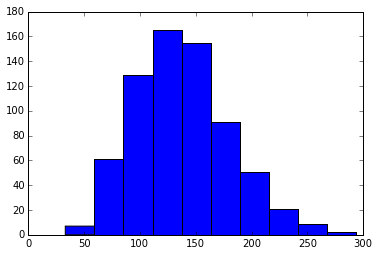

In [10]:
plt.figure()
plt.hist(ISI)

In [11]:
print pools[0].unit[175].threshold_mV

10.0143266476


In [12]:
print np.max(membPotential)

85.2694500139
